In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%matplotlib notebook

In [2]:
data = pd.read_csv("./experience-salary-datasets.csv")

In [3]:
data.shape

(14, 2)

In [4]:
data.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [5]:
def linear_equation(m,b,x):
    return m * x + b

In [6]:
def plot(x, y, m, b):
    plt.scatter(x, y)
    plt.xlabel("Experience")
    plt.ylabel("Salary")
    plt.plot(x, linear_equation(m, b, x), label="fit line for y={0}x + {1}".format(m,b))
    plt.legend()
    plt.show()

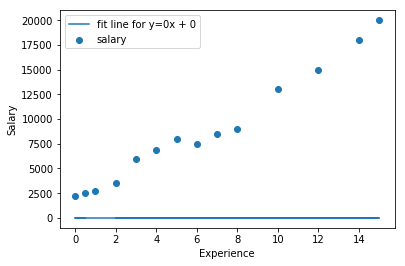

In [7]:
plot(data.experience, data.salary, 0, 0)

In [8]:
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess

In [9]:
def compute_error(b, m, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (m * x[i] + b)) ** 2
    return totalError / float(len(x))

In [10]:
error = compute_error(initial_b, initial_m, data.experience, data.salary)
print("Error at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, error))

Error at b = 0, m = 0, error = 107588214.28571428


In [11]:
def step_gradient(b_current, m_current, x, y, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(x))
    for i in range(0, len(x)):
        b_gradient += -(2/N) * (y[i] - ((m_current * x[i]) + b_current))
        m_gradient += -(2/N) * x[i] * (y[i] - ((m_current * x[i]) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [29]:
from IPython.display import clear_output
def calculate_m_b_with_gradient_descent(x, y, starting_b, starting_m, learning_rate, num_iterations):
    b_best = starting_b
    m_best = starting_m
    error = np.array([])
    b = np.array([b_best])
    m = np.array([m_best])
    
#     fig = plt.figure(figsize=(10,4))
#     ax = fig.add_subplot(121)
#     gradient, = ax.plot(b, m)
#     ax.set_xlim([0,200])
#     ax.set_ylim([0,1000])
    
#     bx = fig.add_subplot(122)
#     bx.scatter(x, y)
#     lr, = bx.plot(x, linear_equation(m, b, x), label="fit line for y={0}x + {1}".format(m,b))
#     bx.legend()
    
#     plt.ion()
#     plt.show()
    
    for i in range(num_iterations):
        b_best, m_best = step_gradient(b_best,m_best, x,y, learning_rate)
        
        error = np.append(error, compute_error(b_best,m_best,x,y))
        b = np.append(b, b_best)
        m = np.append(m, m_best)
        
        clear_output(wait=True)
#         gradient.set_data(b, m)
#         lr.set_data(x, linear_equation(m_best, b_best, x))
        print("iteration: {}".format(i))
#         plt.draw()
#         plt.pause(0.0001)

#         plot(x, y, m, b)
#         print("error: {}".format(error[i]))
    return [b, m, error]

In [30]:
b, m, error = calculate_m_b_with_gradient_descent(data.experience, data.salary, initial_b, initial_m, learning_rate=0.00001, num_iterations=1000)

iteration: 999


<IPython.core.display.Javascript object>


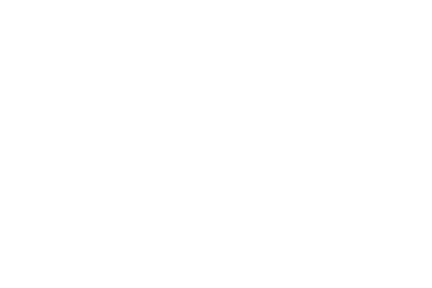

<IPython.core.display.Javascript object>


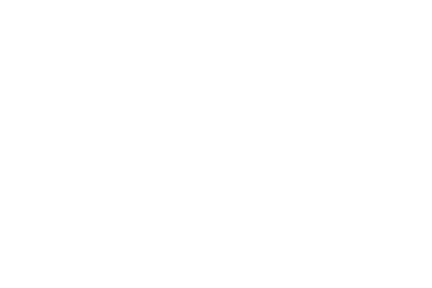

In [32]:
plt.plot(error)